##**Week 1**##

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-11 23:03:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  28.4MB/s    in 2.3s    

2022-09-11 23:03:40 (28.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# unzip
local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()

zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [4]:
import os

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")


train_cat_fnames = os.listdir(train_cats_dir)  # gets list of file names in this dir
train_dog_fnames = os.listdir(train_dogs_dir)


print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.778.jpg', 'cat.151.jpg', 'cat.293.jpg', 'cat.386.jpg', 'cat.949.jpg', 'cat.468.jpg', 'cat.651.jpg', 'cat.346.jpg', 'cat.639.jpg', 'cat.247.jpg']
['dog.754.jpg', 'dog.967.jpg', 'dog.409.jpg', 'dog.82.jpg', 'dog.182.jpg', 'dog.197.jpg', 'dog.698.jpg', 'dog.196.jpg', 'dog.414.jpg', 'dog.685.jpg']


In [5]:
# size of training and validation data

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


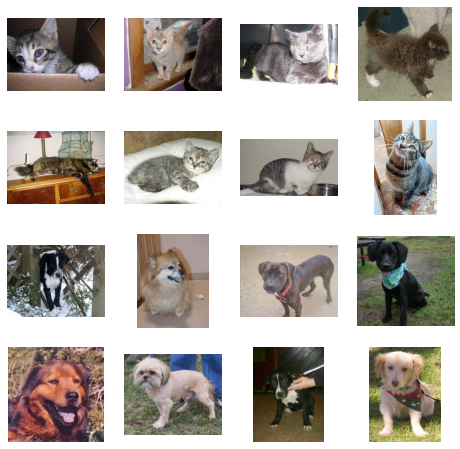

In [6]:
# viz some images

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # idx for iterating over images


fig = plt.figure()
fig.set_size_inches(ncols*2, nrows*2)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
# bulding model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size = 20,
                                                    class_mode = "binary",
                                                    target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        class_mode = "binary",
                                                        target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, 
                    epochs = 15, 
                    validation_data = validation_generator,
                    verbose =2 )

Epoch 1/15
100/100 - 20s - loss: 0.9198 - accuracy: 0.5305 - val_loss: 0.6666 - val_accuracy: 0.6300 - 20s/epoch - 203ms/step
Epoch 2/15
100/100 - 11s - loss: 0.6317 - accuracy: 0.6685 - val_loss: 0.5902 - val_accuracy: 0.6550 - 11s/epoch - 106ms/step
Epoch 3/15
100/100 - 10s - loss: 0.5364 - accuracy: 0.7340 - val_loss: 0.5688 - val_accuracy: 0.6980 - 10s/epoch - 100ms/step
Epoch 4/15
100/100 - 11s - loss: 0.4674 - accuracy: 0.7845 - val_loss: 0.6261 - val_accuracy: 0.6770 - 11s/epoch - 106ms/step
Epoch 5/15
100/100 - 8s - loss: 0.3810 - accuracy: 0.8235 - val_loss: 0.6226 - val_accuracy: 0.7070 - 8s/epoch - 81ms/step
Epoch 6/15
100/100 - 8s - loss: 0.3030 - accuracy: 0.8635 - val_loss: 0.6416 - val_accuracy: 0.7150 - 8s/epoch - 79ms/step
Epoch 7/15
100/100 - 8s - loss: 0.2311 - accuracy: 0.9035 - val_loss: 0.8466 - val_accuracy: 0.7220 - 8s/epoch - 78ms/step
Epoch 8/15
100/100 - 8s - loss: 0.1570 - accuracy: 0.9395 - val_loss: 0.9354 - val_accuracy: 0.7120 - 8s/epoch - 79ms/step
Epoc

Saving cat-g9b34f891a_1280.jpg to cat-g9b34f891a_1280 (1).jpg
[5.0543868e-11]
cat-g9b34f891a_1280.jpg  is a cat


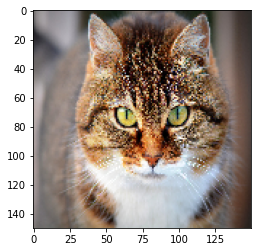

In [28]:
# model prediction
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


for fn in uploaded.keys():

  path = "/content/" + fn
  img = image.load_img(path, target_size = (150, 150))

  plt.figure(figsize = (4,4))
  plt.imshow(img) # show image loaded

  x = image.img_to_array(img)
  x /= 255.
  x = x[np.newaxis, ...]
  
  images = np.concatenate([x], axis =0)

  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  
  print(fn, " is a dog") if classes[0] > 0.5 else print(fn, " is a cat")
  # if classes[0] > 0.5:
  #   print(fn, " is a dog")
  # else:
  #   print(fn, " is a cat")

In [15]:
# # CODE BLOCK FOR SAFARI USERS

# import numpy as np
# from keras.preprocessing import image
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = image.load_img(path, target_size=(150, 150))
#  x = image.img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a dog")
#  else:
#    print(i + " is a cat")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


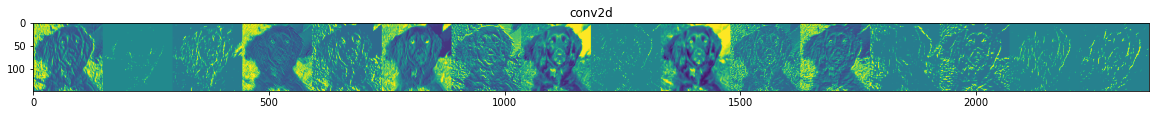

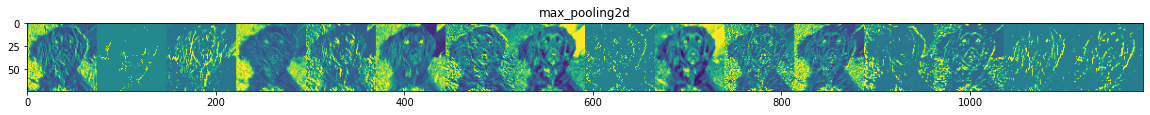

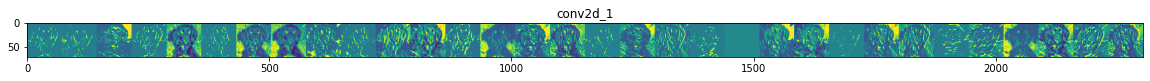

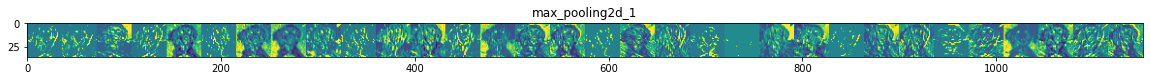

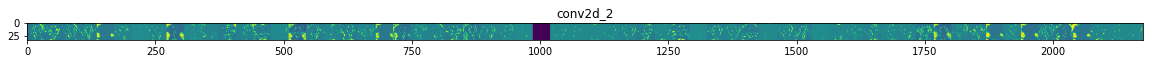

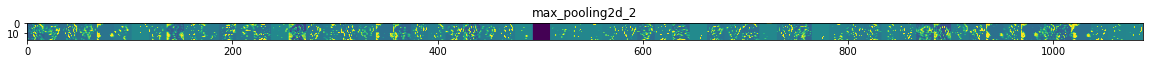

In [21]:
# Viz Rep of image across model layers

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and Validation loss')

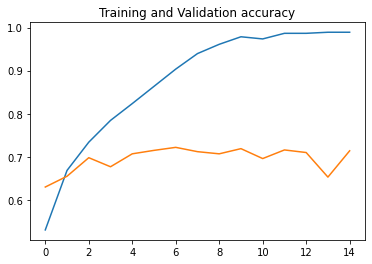

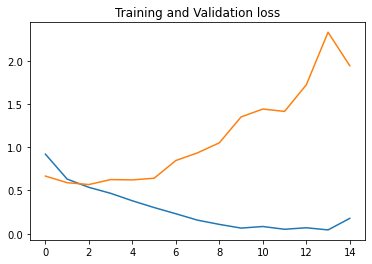

In [25]:
# eval accuracy and loss of model

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  


plt.plot(epochs, acc)
plt.plot(epochs , val_acc)
plt.title("Training and Validation accuracy")
plt.figure()


plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and Validation loss")


###**Week 2(data augmentation)**##

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-09-12 23:46:37--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   284MB/s    in 0.2s    

2022-09-12 23:46:38 (284 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(f"total number of train images : {len(os.listdir(train_dogs_dir)) + len(os.listdir(train_cats_dir))}")

total number of train images : 2000


In [9]:
import tensorflow as tf


def create_model():
  model = tf.keras.models.Sequential([
      
      tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(axis = -1),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(axis = -1),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(axis = -1),

      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(axis = -1),

      # FC
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model_for_aug = create_model()

# data aug is done on train data alone
train_datagen = ImageDataGenerator(
      rescale=1/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
EPOCHS = 20

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 18s - loss: 0.8380 - accuracy: 0.5905 - val_loss: 1.2018 - val_accuracy: 0.5000 - 18s/epoch - 181ms/step
Epoch 2/20
100/100 - 16s - loss: 0.7358 - accuracy: 0.6605 - val_loss: 1.3280 - val_accuracy: 0.5000 - 16s/epoch - 164ms/step
Epoch 3/20
100/100 - 17s - loss: 0.7293 - accuracy: 0.6655 - val_loss: 2.0939 - val_accuracy: 0.5000 - 17s/epoch - 166ms/step
Epoch 4/20
100/100 - 17s - loss: 0.6946 - accuracy: 0.6740 - val_loss: 1.8251 - val_accuracy: 0.5030 - 17s/epoch - 167ms/step
Epoch 5/20
100/100 - 17s - loss: 0.6839 - accuracy: 0.6815 - val_loss: 1.0753 - val_accuracy: 0.5890 - 17s/epoch - 174ms/step
Epoch 6/20
100/100 - 17s - loss: 0.6357 - accuracy: 0.7130 - val_loss: 0.6860 - val_accuracy: 0.6870 - 17s/epoch - 166ms/step
Epoch 7/20
100/100 - 17s - loss: 0.6540 - accuracy: 0.7070 - val_loss: 0.6467 - val_accuracy: 0.7010 - 17s/epoch - 174ms/step
Epoch 8/20
100/100 - 17s - loss: 0

In [12]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

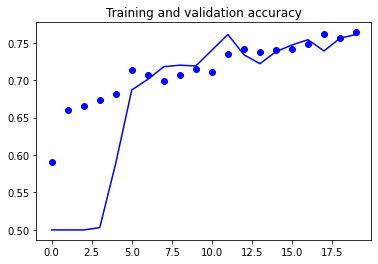

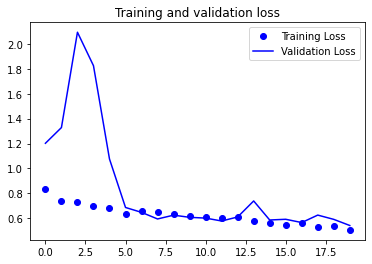

In [13]:
plot_loss_acc(history_with_aug)

In [ ]:
#N.B: If model is trained for longer periods we can attain much better accuracy, since acc and val acc are very close
# Or can try using a bigger network.
# i.e No more overfitting problem

##**Week 3(Transfer Learning)**##

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
import tensorflow as tf


base_model = InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False,
    weights = "imagenet"
)

for layer in base_model.layers:
  layer.trainable = False

# n.b: Could as set weights as none
# download from : !wget --no-check-certificate \
# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
# -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# and used base_Model.load_weights = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


base_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [2]:
# choose 'mixed8' as the last layer for the pretrained_model model
last_layer = base_model.get_layer("mixed8")
print("last layer output shape: ", last_layer.output_shape)

last_output = last_layer.output

last layer output shape:  (None, 3, 3, 1280)


In [3]:
# Add our own Model Dense layers 

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [4]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [5]:
# Prep dataset

import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2022-09-13 13:11:36--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 64.233.181.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   134MB/s    in 0.5s    

2022-09-13 13:11:36 (134 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 34s - loss: 0.3059 - accuracy: 0.8600 - val_loss: 0.1616 - val_accuracy: 0.9620 - 34s/epoch - 340ms/step
Epoch 2/20
100/100 - 17s - loss: 0.1907 - accuracy: 0.9255 - val_loss: 0.1093 - val_accuracy: 0.9610 - 17s/epoch - 175ms/step
Epoch 3/20
100/100 - 24s - loss: 0.2042 - accuracy: 0.9175 - val_loss: 0.0897 - val_accuracy: 0.9650 - 24s/epoch - 244ms/step
Epoch 4/20
100/100 - 18s - loss: 0.1694 - accuracy: 0.9260 - val_loss: 0.0877 - val_accuracy: 0.9630 - 18s/epoch - 176ms/step
Epoch 5/20
100/100 - 20s - loss: 0.1638 - accuracy: 0.9370 - val_loss: 0.0858 - val_accuracy: 0.9690 - 20s/epoch - 199ms/step
Epoch 6/20
100/100 - 22s - loss: 0.1728 - accuracy: 0.9310 - val_loss: 0.0805 - val_accuracy: 0.9660 - 22s/epoch - 215ms/step
Epoch 7/20
100/100 - 17s - loss: 0.1478 - accuracy: 0.9360 - val_loss: 0.0882 - val_accuracy: 0.9710 - 17s/epoch - 173ms/step
Epoch 8/20
100/100 - 18s - loss: 0.1440 - accuracy: 0.9465 - val_loss: 0.0960 - val_accuracy: 0.9630 - 18s/epoch - 184

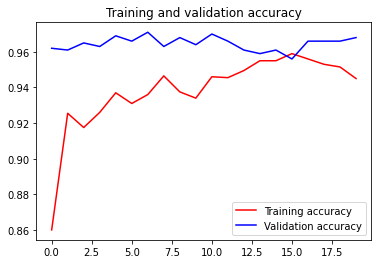

<Figure size 432x288 with 0 Axes>

In [7]:
# Eval results

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

##**Week 3**##

In [1]:
# Using CGI gen Rock-Paper-Scissors Dataset

# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-09-13 17:45:11--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M   276MB/s    in 0.7s    

2022-09-13 17:45:12 (276 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2022-09-13 17:45:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-s

In [2]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('\ntotal training paper images:', len(os.listdir(paper_dir)))
print('\ntotal training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir) # list of rock files name
print(rock_files[:10])

paper_files = os.listdir(paper_dir) # list of paper files name
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)  # list of scissors files name
print(scissors_files[:10])

total training rock images: 840

total training paper images: 840

total training scissors images: 840
['rock04-111.png', 'rock01-115.png', 'rock03-114.png', 'rock04-020.png', 'rock05ck01-082.png', 'rock07-k03-083.png', 'rock01-029.png', 'rock04-072.png', 'rock06ck02-074.png', 'rock01-097.png']
['paper05-053.png', 'paper03-034.png', 'paper01-074.png', 'paper05-096.png', 'paper07-065.png', 'paper06-062.png', 'paper01-013.png', 'paper03-028.png', 'paper06-076.png', 'paper06-041.png']
['testscissors03-047.png', 'testscissors01-067.png', 'scissors02-119.png', 'testscissors01-002.png', 'testscissors03-042.png', 'scissors03-089.png', 'testscissors02-080.png', 'scissors04-008.png', 'scissors03-105.png', 'testscissors03-024.png']


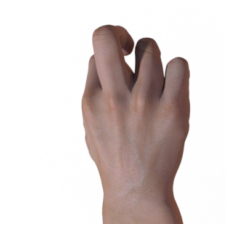

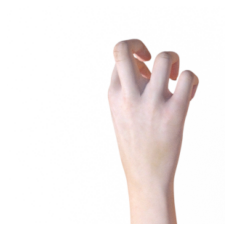

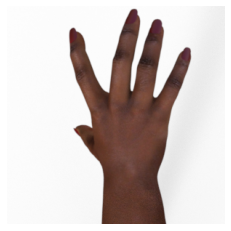

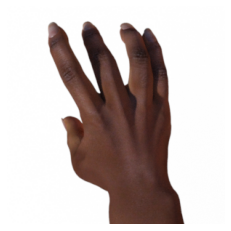

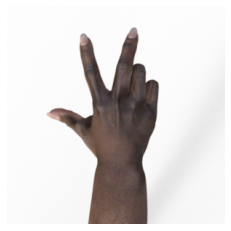

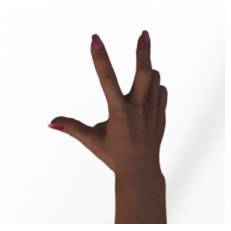

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, 3, activation ="relu", input_shape = (150, 150, 3)),
    tf.keras.layers.Conv2D(64, 3, activation ="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, 3, activation ="relu"),
    tf.keras.layers.Conv2D(128, 3, activation ="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.MaxPooling2D(2, 2),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(3, "softmax")
])


model.compile(loss = "categorical_crossentropy", 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [6]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=40, 
                    validation_data = validation_generator, verbose = 1, validation_steps=12)

Epoch 1/25
40/40 [==============================] - 28s 560ms/step - loss: 1.1177 - accuracy: 0.3774 - val_loss: 0.9552 - val_accuracy: 0.7823
Epoch 2/25
40/40 [==============================] - 21s 519ms/step - loss: 0.8311 - accuracy: 0.5964 - val_loss: 0.4773 - val_accuracy: 0.8602
Epoch 3/25
40/40 [==============================] - 23s 566ms/step - loss: 0.5787 - accuracy: 0.7520 - val_loss: 0.3451 - val_accuracy: 0.8360
Epoch 4/25
40/40 [==============================] - 21s 521ms/step - loss: 0.4017 - accuracy: 0.8444 - val_loss: 0.1647 - val_accuracy: 0.9435
Epoch 5/25
40/40 [==============================] - 27s 674ms/step - loss: 0.2906 - accuracy: 0.8976 - val_loss: 0.1160 - val_accuracy: 0.9624
Epoch 6/25
40/40 [==============================] - 23s 571ms/step - loss: 0.1940 - accuracy: 0.9254 - val_loss: 0.2799 - val_accuracy: 0.8790
Epoch 7/25
40/40 [==============================] - 25s 611ms/step - loss: 0.1669 - accuracy: 0.9365 - val_loss: 0.1711 - val_accuracy: 0.9516

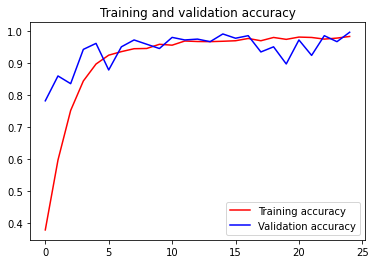

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


# come back and try to use batchNorm to see why using batchNorm is causing overfitting

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image



uploaded = files.upload()

for fn in uploaded.keys():

  img_path = fn
  img= image.load_img(img_path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.concatenate([x], axis = 0)
  classes = model.predict(images, batch_size = 10)
  print(fn)
  prediction = np.argmax(classes, axis =1)[0]

  if(prediction == 0):
    print(f"{fn} is predicted as paper\n")
  elif(prediction == 1):
    print(f"{fn} is predicted as rock\n")
  else:
    print(f"{fn} is predicted as scissors\n")

Saving paper1.png to paper1 (3).png
Saving paper2.png to paper2.png
Saving paper5.png to paper5.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock8.png to rock8.png
Saving rock-hires1.png to rock-hires1.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors5.png to scissors5.png
Saving scissors-hires2.png to scissors-hires2.png
paper1.png
paper1.png is predicted as paper

paper2.png
paper2.png is predicted as paper

paper5.png
paper5.png is predicted as paper

rock1.png
rock1.png is predicted as rock

rock2.png
rock2.png is predicted as rock

rock8.png
rock8.png is predicted as rock

rock-hires1.png
rock-hires1.png is predicted as rock

scissors1.png
scissors1.png is predicted as scissors

scissors2.png
scissors2.png is predicted as scissors

scissors5.png
scissors5.png is predicted as scissors

scissors-hires2.png
scissors-hires2.png is predicted as scissors

